<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== One-way ANOVA Analysis ===

Analyzing the relationship between day of week and total bill


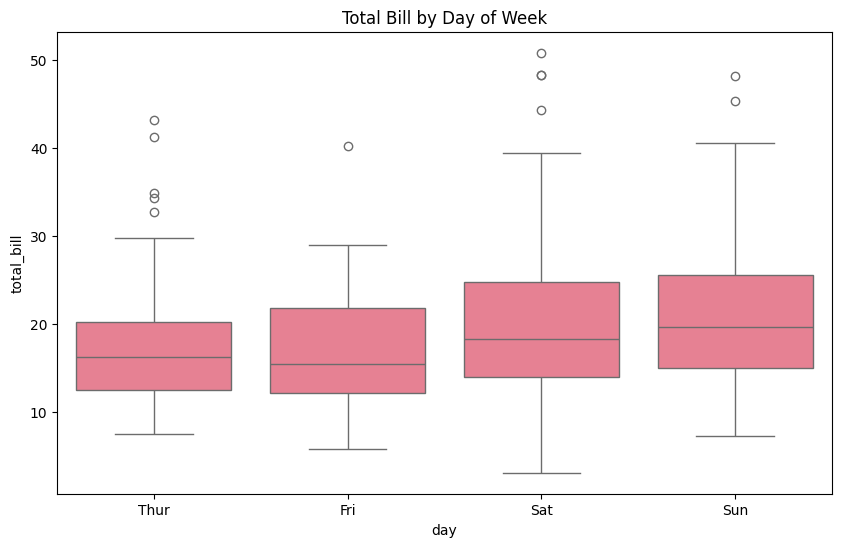


One-way ANOVA results:
F-statistic: 2.7675
p-value: 0.0425

Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------

=== Two-way ANOVA Analysis ===

Analyzing the relationship between day, time, and total bill


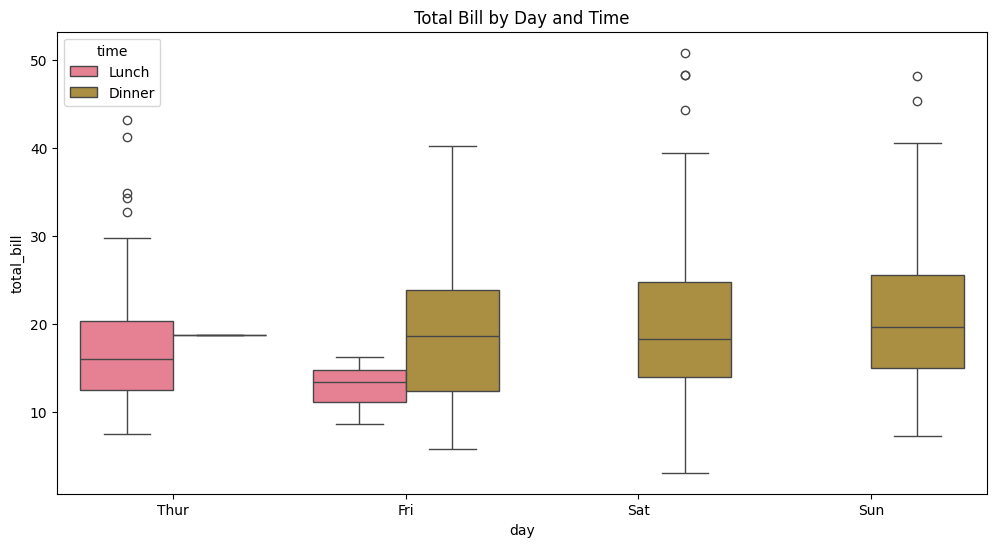


Two-way ANOVA results:
                      sum_sq     df         F    PR(>F)
C(day)            110.199393    3.0  0.474934  0.700028
C(time)           612.986863    1.0  7.925488  0.005283
C(day):C(time)     94.676220    3.0  0.408032  0.747369
Residual        18407.808794  238.0       NaN       NaN


<ipython-input-4-7cd837fa80f0>:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_means = tips.groupby(['day', 'time'])['total_bill'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

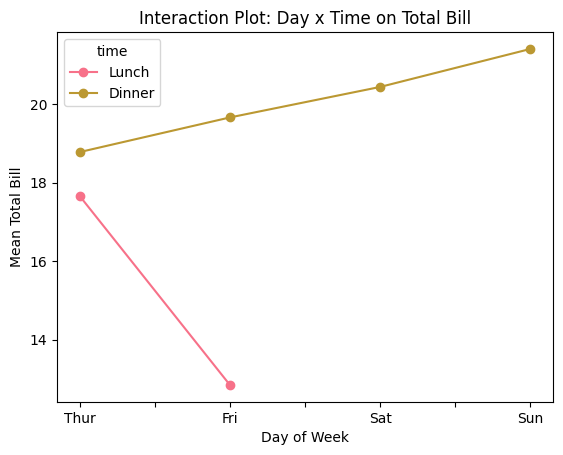

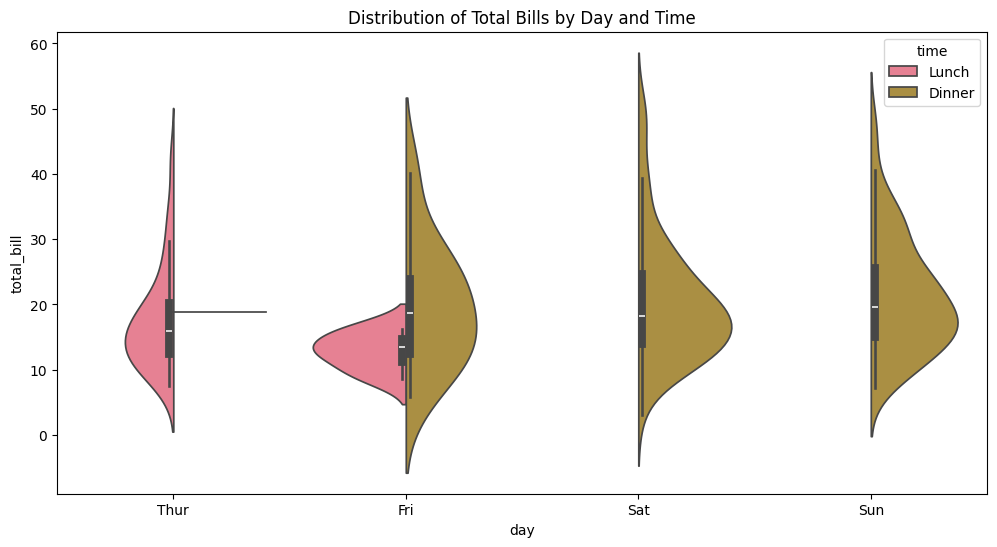


Interpretation Guide:
1. One-way ANOVA:
   - Tests if there are significant differences in total bills across days
   - Null hypothesis: all days have the same mean total bill
   - If p-value < 0.05: reject null hypothesis (days are significantly different)
   - Current p-value: 0.0425

2. Two-way ANOVA results interpretation:
   - Main effect of Day: Tests if days differ regardless of time
   - Main effect of Time: Tests if lunch/dinner differ regardless of day
   - Interaction effect: Tests if the effect of time depends on the day
   - Look at p-values < 0.05 for significant effects

3. Visualization interpretation:
   - Box plots show median, quartiles, and potential outliers
   - Interaction plot shows how time and day factors interact
   - Non-parallel lines in interaction plot suggest interaction effects
   - Violin plots show the distribution shape of bills for each combination


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set the style for better visualizations
#plt.style.use('darkgrid')
sns.set_palette("husl")

# Load the tips dataset from seaborn
tips = sns.load_dataset("tips")

# ==================
# ONE-WAY ANOVA
# ==================
print("=== One-way ANOVA Analysis ===")
print("\nAnalyzing the relationship between day of week and total bill")

# Create visualization for one-way ANOVA
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Total Bill by Day of Week')
plt.show()

# Perform one-way ANOVA
days = tips['day'].unique()
bill_by_day = [tips[tips['day'] == day]['total_bill'] for day in days]
f_stat, p_val = stats.f_oneway(*bill_by_day)

print("\nOne-way ANOVA results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Perform Tukey's HSD test for multiple comparisons
tukey = pairwise_tukeyhsd(tips['total_bill'], tips['day'])
print("\nTukey's HSD test results:")
print(tukey)

# ==================
# TWO-WAY ANOVA
# ==================
print("\n=== Two-way ANOVA Analysis ===")
print("\nAnalyzing the relationship between day, time, and total bill")

# Create visualization for two-way ANOVA
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
plt.title('Total Bill by Day and Time')
plt.show()

# Prepare data for two-way ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# Fit the model
model = ols('total_bill ~ C(day) + C(time) + C(day):C(time)', data=tips).fit()
anova_table = anova_lm(model, typ=2)
print("\nTwo-way ANOVA results:")
print(anova_table)

# Create interaction plot
plt.figure(figsize=(10, 6))
tips_means = tips.groupby(['day', 'time'])['total_bill'].mean().unstack()
tips_means.plot(marker='o')
plt.title('Interaction Plot: Day x Time on Total Bill')
plt.xlabel('Day of Week')
plt.ylabel('Mean Total Bill')
plt.show()

# Additional visualizations for better understanding
# Distribution of total bills by day and time
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', hue='time', data=tips, split=True)
plt.title('Distribution of Total Bills by Day and Time')
plt.show()

# Print interpretative comments
print("\nInterpretation Guide:")
print("1. One-way ANOVA:")
print(f"   - Tests if there are significant differences in total bills across days")
print(f"   - Null hypothesis: all days have the same mean total bill")
print(f"   - If p-value < 0.05: reject null hypothesis (days are significantly different)")
print(f"   - Current p-value: {p_val:.4f}")

print("\n2. Two-way ANOVA results interpretation:")
print("   - Main effect of Day: Tests if days differ regardless of time")
print("   - Main effect of Time: Tests if lunch/dinner differ regardless of day")
print("   - Interaction effect: Tests if the effect of time depends on the day")
print("   - Look at p-values < 0.05 for significant effects")

print("\n3. Visualization interpretation:")
print("   - Box plots show median, quartiles, and potential outliers")
print("   - Interaction plot shows how time and day factors interact")
print("   - Non-parallel lines in interaction plot suggest interaction effects")
print("   - Violin plots show the distribution shape of bills for each combination")

In [ ]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
